<a href="https://colab.research.google.com/github/rojre1979/AI_References_2022/blob/main/SP902_Tabular_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.tabular.all import *

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SP90x_data/SP902-Tabular-Capstone.csv")
df['Label'] = df['Clicked on Ad'].astype(str)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Label
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0


In [ ]:

dls = TabularDataLoaders.from_df(df, y_names="Label",
    cat_names = ['City', 'Male', 'Country'],
    cont_names = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],
    procs = [Categorify, FillMissing, Normalize],
    valid_pct=0.2
    )

In [ ]:

dls.show_batch()


,City,Male,Country,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Label
0,New Traceystad,1,Dominican Republic,74.629997,26.0,51975.410091,235.990005,0
1,Shaneland,0,Tanzania,83.400001,39.0,60879.480464,235.009997,0
2,New Juan,0,Cameroon,84.790000,33.0,61771.898506,214.529998,0
3,New Steve,1,United States of America,86.779999,30.0,54952.421875,170.130005,0
4,Jamiefort,1,Austria,75.150002,22.0,52010.999965,212.869995,0
5,Alvarezland,0,Svalbard & Jan Mayen Islands,35.660000,36.0,59240.238427,172.570008,1
6,Nicholasport,1,Armenia,89.660003,34.0,52802.578192,171.229996,0
7,Kevinchester,1,Cape Verde,81.749999,24.0,52656.128980,190.080002,0
8,Williamsborough,0,Lithuania,39.939998,41.0,64927.191322,156.300004,1
9,North Tiffany,0,Bermuda,80.940002,36.0,60803.000050,239.940003,0


In [ ]:
precision = Precision()
recall = Recall()
learn = tabular_learner(dls, metrics=[error_rate, accuracy, precision, recall])


In [ ]:

learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.327892,0.586850,0.285000,0.715000,0.643312,0.990196,00:03


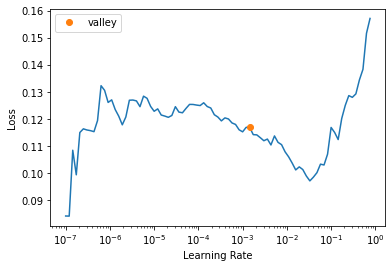

In [ ]:
best_learning_rate = learn.lr_find()

In [ ]:
learn.fine_tune(4, best_learning_rate[0])

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.121497,0.398941,0.065000,0.935000,0.893805,0.990196,00:00


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,0.102087,0.230653,0.035000,0.965000,0.961165,0.970588,00:00
1,0.093602,0.132058,0.025000,0.975000,0.980198,0.970588,00:00
2,0.081832,0.094013,0.030000,0.970000,0.970588,0.970588,00:00
3,0.071361,0.082948,0.030000,0.970000,0.970588,0.970588,00:00


In [ ]:
learn.show_results()


,City,Male,Country,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Label,Label_pred
0,635.0,2.0,221.0,0.787539,0.250175,0.617761,-1.128446,1.0,1.0
1,557.0,1.0,119.0,-0.886311,-1.362002,0.588238,0.241990,1.0,1.0
2,791.0,1.0,196.0,0.226244,2.438131,0.501370,-0.680835,1.0,1.0
3,319.0,1.0,11.0,0.149733,0.941109,-0.279748,-1.672204,1.0,1.0
4,640.0,2.0,187.0,-0.299303,2.783597,-0.652593,-0.652083,1.0,1.0
5,272.0,2.0,136.0,0.161648,0.595642,0.744645,1.741695,0.0,0.0
6,762.0,1.0,101.0,1.032126,-0.786224,-0.251599,1.188046,0.0,0.0
7,702.0,2.0,62.0,1.009548,-0.786224,0.456919,0.841872,0.0,0.0
8,897.0,1.0,38.0,-0.655522,0.941109,-1.001171,-1.629651,1.0,1.0


In [ ]:
row, clas, probs = learn.predict(df.iloc[0])


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

row.show()


,City,Male,Country,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Label
0,Wrightburgh,0,Tunisia,68.95,35.0,61833.899658,256.089999,0


In [ ]:

clas, probs


(tensor(0), tensor([0.9515, 0.0485]))

In [ ]:

test_df = df.copy()
test_df.drop(['Label', 'Clicked on Ad'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

In [ ]:

preds = learn.get_preds(dl=dl)


In [ ]:
preds[0]

tensor([[0.9515, 0.0485],
        [0.9899, 0.0101],
        [0.9728, 0.0272],
        ...,
        [0.0057, 0.9943],
        [0.7071, 0.2929],
        [0.0383, 0.9617]])

In [ ]:

pd.DataFrame(preds[0])

,0,1
0,0.951547,0.048453
1,0.989885,0.010115
2,0.972784,0.027216
3,0.970933,0.029067
4,0.987473,0.012527
...,...,...
995,0.949095,0.050904
996,0.011075,0.988925
997,0.005683,0.994317
998,0.707052,0.292948


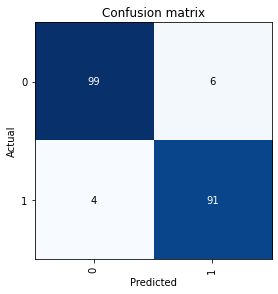

In [ ]:
classif_interp = ClassificationInterpretation.from_learner(learn)
classif_interp.plot_confusion_matrix()